In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 10.
L = 10.
m = 1.

In [3]:
def Accel(r):
    a = -g*np.sin(r)/L
    return a

def Verlet(r1,r0,v0,dt):
    r = 2.*r1-r0+Accel(r1)*dt**2.
    v = 0.5*(r-r0)/dt
    return r,v

def Leapfrog(r0,v0,dt):
    Vmed = v0 + Accel(r0)*dt/2.
    r = r0 + Vmed*dt
    v = Vmed + Accel(r)*dt/2.
    return r,v

def Euler(r0,v0,dt):
    v = v0 + Accel(r0)*dt
    r = r0 + v0 * dt
    return r,v

def EulerCromer(r0,v0,dt):
    v = v0 + Accel(r0)*dt
    r = r0 + v * dt
    return r,v

def PuntoMed(r0,v0,dt):
    v = v0 + Accel(r0)*dt
    r = r0 + 0.5*(v+v0)*dt
    return r,v

# 3. Simulación del Pendulo


Problema 2. a)

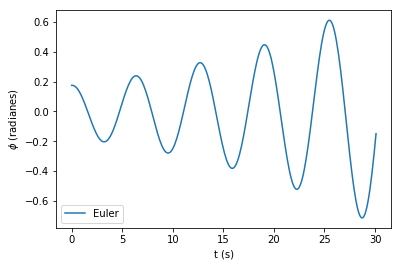

In [4]:
#Verlet
dt = 0.1
steps = 300
deg = 10.
omega = 0.
t = 0.
phi = np.radians(deg) #conversion a radianes

Phiarr,T = [phi],[t]
for i in range(steps+1):
    phi,omega = Euler(phi,omega,dt)
    t+=dt
    Phiarr.append(phi),T.append(t)

plt.plot(T,Phiarr,label='Euler')
plt.xlabel('t (s)')
plt.ylabel(r'$\phi$ (radianes)')
plt.legend(loc=3)
plt.show()

Problema 2.b)

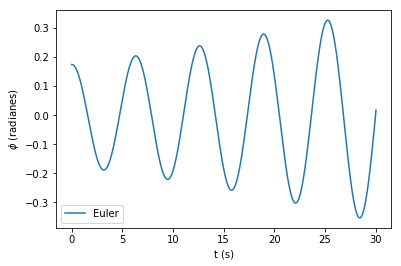

In [5]:
dt = 0.05
steps = 600
deg = 10.
omega = 0.
t = 0.
phi = np.radians(deg) #conversion a radianes

Phiarr,T = [phi],[t]
for i in range(steps+1):
    phi,omega = Euler(phi,omega,dt)
    t+=dt
    Phiarr.append(phi),T.append(t)

plt.plot(T,Phiarr,label='Euler')
plt.xlabel('t (s)')
plt.ylabel(r'$\phi$ (radianes)')
plt.legend(loc=3)
plt.show()

Problema 3. a)

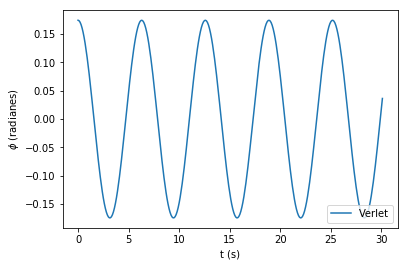

In [6]:
#Verlet
dt = 0.1
steps = 300
deg = 10.
omega = 0.
t = 0.
phi = np.radians(deg) #conversion a radianes

phi_old = phi-omega*dt+ 0.5*Accel(phi)*dt**2. #Iniciar Verlet
Phiarr,T = [phi],[t]
for i in range(steps+1):
    phi_new,omega = Verlet(phi,phi_old,omega,dt)
    phi_old = phi
    phi = phi_new
    t+=dt
    Phiarr.append(phi),T.append(t)

plt.plot(T,Phiarr,label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\phi$ (radianes)')
plt.legend(loc=4)
plt.show()

Problema 3. b)

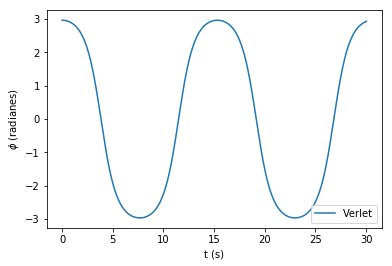

In [7]:
#Verlet
dt = 0.05
steps = 600
deg = 170.
omega = 0.
t = 0.
phi = np.radians(deg) #conversion a radianes

phi_old = phi-omega*dt+ 0.5*Accel(phi)*dt**2. #Iniciar Verlet
Phiarr,T = [phi],[t]
for i in range(steps+1):
    phi_new,omega = Verlet(phi,phi_old,omega,dt)
    phi_old = phi
    phi = phi_new
    t+=dt
    Phiarr.append(phi),T.append(t)

plt.plot(T,Phiarr,label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\phi$ (radianes)')
plt.legend(loc=4)
plt.show()
    

Problema 4a)

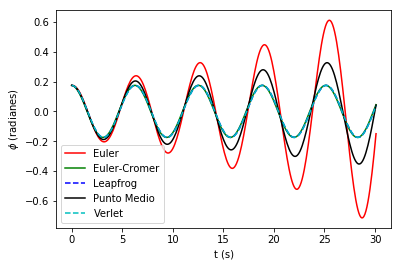

In [8]:
dt = 0.1
steps = 300
deg = 10.
omegaEU,omegaEC,omegaLF,omegaPM,omegaVer= 0.,0.,0.,0.,0.
t = 0.
phi0 =np.radians(deg) #conversion a radianes
phiEU,phiEC=phi0,phi0 
phiLF,phiPM=phi0,phi0 
phiVer=phi0

PhiEU,PhiEC=[phi0],[phi0]
PhiLF,PhiPM=[phi0],[phi0]
PhiVer=[phi0]
phi_old = phiVer-omegaVer*dt+ 0.5*Accel(phiVer)*dt**2.
T = [t]
for i in range(steps+1):
    phiEU,omegaEU = Euler(phiEU,omegaEU,dt)
    phiEC,omegaEC = EulerCromer(phiEC,omegaEC,dt)
    phiLF,omegaLF = Leapfrog(phiLF,omegaLF,dt)
    phiPM,omegaPM = PuntoMed(phiPM,omegaPM,dt)
    phi_new,omegaVer = Verlet(phiVer,phi_old,omega,dt)
    phi_old = phiVer
    phiVer = phi_new
    t+=dt
    PhiEU.append(phiEU),PhiEC.append(phiEC),PhiLF.append(phiLF)
    PhiPM.append(phiPM),PhiVer.append(phiVer),T.append(t)


plt.plot(T,PhiEU,'r',label='Euler')
plt.plot(T,PhiEC,'g',label='Euler-Cromer')
plt.plot(T,PhiLF,'b--',label='Leapfrog')
plt.plot(T,PhiPM,'k',label='Punto Medio')
plt.plot(T,PhiVer,'c--',label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\phi$ (radianes)')
plt.legend()
plt.show()

Problema 4b

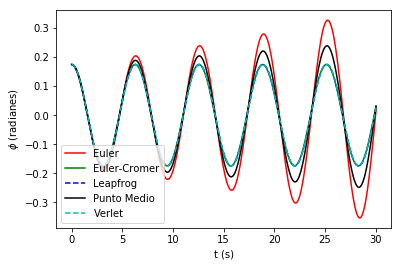

In [9]:
dt = 0.05
steps = 600
deg = 10.
omegaEU,omegaEC,omegaLF,omegaPM,omegaVer= 0.,0.,0.,0.,0.
t = 0.
phi0 =np.radians(deg) #conversion a radianes
phiEU,phiEC=phi0,phi0 
phiLF,phiPM=phi0,phi0 
phiVer=phi0

PhiEU,PhiEC=[phi0],[phi0]
PhiLF,PhiPM=[phi0],[phi0]
PhiVer=[phi0]
phi_old = phiVer-omegaVer*dt+ 0.5*Accel(phiVer)*dt**2.
T = [t]
for i in range(steps+1):
    phiEU,omegaEU = Euler(phiEU,omegaEU,dt)
    phiEC,omegaEC = EulerCromer(phiEC,omegaEC,dt)
    phiLF,omegaLF = Leapfrog(phiLF,omegaLF,dt)
    phiPM,omegaPM = PuntoMed(phiPM,omegaPM,dt)
    phi_new,omegaVer = Verlet(phiVer,phi_old,omega,dt)
    phi_old = phiVer
    phiVer = phi_new
    t+=dt
    PhiEU.append(phiEU),PhiEC.append(phiEC),PhiLF.append(phiLF)
    PhiPM.append(phiPM),PhiVer.append(phiVer),T.append(t)


plt.plot(T,PhiEU,'r',label='Euler')
plt.plot(T,PhiEC,'g',label='Euler-Cromer')
plt.plot(T,PhiLF,'b--',label='Leapfrog')
plt.plot(T,PhiPM,'k',label='Punto Medio')
plt.plot(T,PhiVer,'c--',label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\phi$ (radianes)')
plt.legend(loc=3)
plt.show()

Problema 4c)

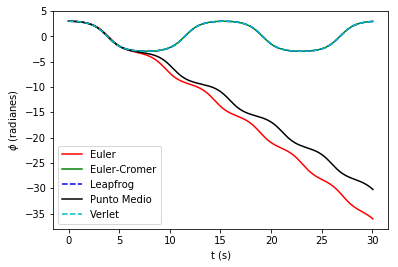

In [10]:
dt = 0.05
steps = 600
deg = 170.
omegaEU,omegaEC,omegaLF,omegaPM,omegaVer= 0.,0.,0.,0.,0.
t = 0.
phi0 =np.radians(deg) #conversion a radianes
phiEU,phiEC=phi0,phi0 
phiLF,phiPM=phi0,phi0 
phiVer=phi0

PhiEU,PhiEC=[phi0],[phi0]
PhiLF,PhiPM=[phi0],[phi0]
PhiVer=[phi0]
phi_old = phiVer-omegaVer*dt+ 0.5*Accel(phiVer)*dt**2.
T = [t]
for i in range(steps+1):
    phiEU,omegaEU = Euler(phiEU,omegaEU,dt)
    phiEC,omegaEC = EulerCromer(phiEC,omegaEC,dt)
    phiLF,omegaLF = Leapfrog(phiLF,omegaLF,dt)
    phiPM,omegaPM = PuntoMed(phiPM,omegaPM,dt)
    phi_new,omegaVer = Verlet(phiVer,phi_old,omega,dt)
    phi_old = phiVer
    phiVer = phi_new
    t+=dt
    PhiEU.append(phiEU),PhiEC.append(phiEC),PhiLF.append(phiLF)
    PhiPM.append(phiPM),PhiVer.append(phiVer),T.append(t)


plt.plot(T,PhiEU,'r',label='Euler')
plt.plot(T,PhiEC,'g',label='Euler-Cromer')
plt.plot(T,PhiLF,'b--',label='Leapfrog')
plt.plot(T,PhiPM,'k',label='Punto Medio')
plt.plot(T,PhiVer,'c--',label='Verlet')
plt.xlabel('t (s)')
plt.ylabel(r'$\phi$ (radianes)')
plt.legend()
plt.show()

Problema 5)

1.23717914826


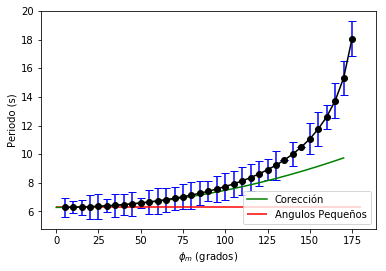

In [11]:
dt = 0.05
steps = 2000
deg = np.arange(5,180,5)
Periodos,Error = [],[]
for i in deg:
    omega = 0.
    t = 0.
    phi = np.radians(i) #conversion a radianes

    contador = 0
    phi_old = phi-omega*dt+ 0.5*Accel(phi)*dt**2.
    Phiarr,T,Per = [phi],[t],[]
    for i in range(steps+1):
        phi_new,omega = Verlet(phi,phi_old,omega,dt)
        phi_old = phi
        phi = phi_new
        t+=dt
        Phiarr.append(phi),T.append(t)
        if(phi*phi_old<0.):
            if(contador==0):
                t_old=t
            else:
                Per.append(2.*(t-t_old))
                t_old=t
            contador+=1
    Periodos.append(np.mean(Per))
    Error.append(100.*np.std(Per)/float(np.sqrt(contador)))
print(max(Error))
theta = np.linspace(0,170,1000)
plt.errorbar(deg,Periodos,yerr=Error,fmt='ko-',ecolor='b',capsize=4)
plt.hlines(2.*np.pi,xmin=0,xmax=180,color='r',label='Angulos Pequeños')
plt.plot(theta,2.*np.pi*(1. + np.radians(theta)**2./16),'g', label='Corección')
plt.xlabel(r'$\phi_m$ (grados)')
plt.ylabel('Periodo (s)')
plt.legend(loc=4)
plt.show()

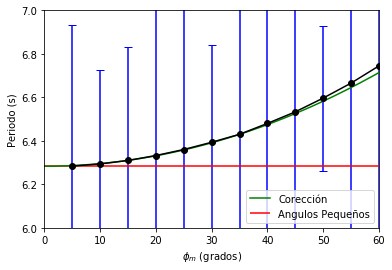

In [12]:
plt.errorbar(deg,Periodos,yerr=Error,fmt='ko-',ecolor='b',capsize=4)
plt.hlines(2.*np.pi,xmin=0,xmax=180,color='r',label='Angulos Pequeños')
plt.plot(theta,2.*np.pi*(1. + np.radians(theta)**2./16),'g', label='Corección')
plt.xlim(0,60)
plt.ylim(6,7)
plt.xlabel(r'$\phi_m$ (grados)')
plt.ylabel('Periodo (s)')
plt.legend(loc=4)
plt.show()

In [13]:
PerTeo = 2.*np.pi
ERROR = 100*abs(np.array(Periodos)-PerTeo)/abs(PerTeo)
print(ERROR)

[  1.09126268e-02   1.64933539e-01   4.21635061e-01   7.81017190e-01
   1.22254381e+00   1.75306028e+00   2.33662841e+00   3.13240312e+00
   3.98122949e+00   4.98738143e+00   6.08500172e+00   7.34726506e+00
   8.68008971e+00   1.02147981e+01   1.18800304e+01   1.37663112e+01
   1.57704845e+01   1.80195116e+01   2.05121229e+01   2.32495879e+01
   2.61966070e+01   2.95123349e+01   3.32057676e+01   3.72349668e+01
   4.18752636e+01   4.69530641e+01   5.27887454e+01   5.94062404e+01
   6.71126902e+01   7.61938841e+01   8.72060018e+01   1.00747435e+02
   1.18610683e+02   1.43904950e+02   1.87752137e+02]


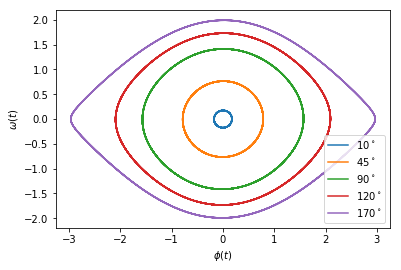

In [14]:
dt = 0.01
steps = 7000
deg = [10,45,90,120,170]
for i in deg:
    omega = 0.
    t = 0.
    phi = np.radians(i) #conversion a radianes

    contador = 0
    phi_old = phi-omega*dt+ 0.5*Accel(phi)*dt**2.
    PhiArr,OmegaArr = [phi],[omega]
    for j in range(steps+1):
        phi_new,omega = Verlet(phi,phi_old,omega,dt)
        phi_old = phi
        phi = phi_new
        t+=dt
        Phiarr.append(phi),T.append(t)
        if(phi*phi_old<0.):
            if(contador==0):
                t_old=t
            else:
                Per.append(2.*(t-t_old))
                t_old=t
            contador+=1
        PhiArr.append(phi),OmegaArr.append(omega)
    plt.plot(PhiArr,OmegaArr,'',label = r'%d$^\circ$'%(i))
plt.xlabel(r'$\phi(t)$')
plt.ylabel(r'$\omega(t)$')
plt.legend(loc=4)
plt.show()